## Reto 1: Boxplots

### 1. Objetivos:
    - Aprender a graficar e interpretar boxplots utilizando Seaborn
    - Aprender a lidiar con valores atípicos usando IQR-Score
 
---
    
### 2. Desarrollo:

#### a) Usando boxplots para analizar la distribución de nuestros datos

Vamos a hacer algunas gráficas de boxplot y describirlas en equipo. Usa Seaborn para generar gráficas boxplot de los siguientes datasets y columnas:

1. Dataset: 'near_earth_objects-jan_feb_1995-clean.csv'
    - Columnas a graficar: 'estimated_diameter.meters.estimated_diameter_max' y 'relative_velocity.kilometers_per_second'
2. Dataset: 'new_york_times_bestsellers-clean.json'
    - Columnas a graficar: 'price.numberDouble'
3. Dataset: 'melbourne_housing-clean.csv'
    - Columnas a graficar: 'land_size'
    
> Para conocer más detalles acerca de estos datasets, ve a Datasets/Readme.md y visita los links de las fuentes de donde provienen. Es una gran idea hacer esto para que entiendas el contexto alrededor de los análisis que vamos a estar realizando.
    
Realiza estas 4 visualizaciones y comenta con la experta y tus compañeros qué conclusiones o hipótesis podemos hacer sobre nuestros datos. Para profundizar en el análisis puedes obtener también el rango, la mediana, el valor mínimo y máximo, el percentil 25 y el percentil 75. De esta manera tendrás valores concretos con los que realizar tu análisis.

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

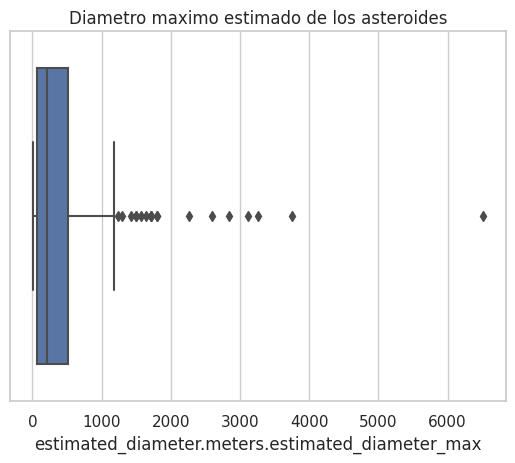

Rango:  6513.905031051
Media:  410.08604223976545
Mediana:  215.7943048444
Moda:  0    284.472297
Name: estimated_diameter.meters.estimated_diameter_max, dtype: float64
Desviación estándar:  614.6915918552232
Varianza:  377845.7530975083


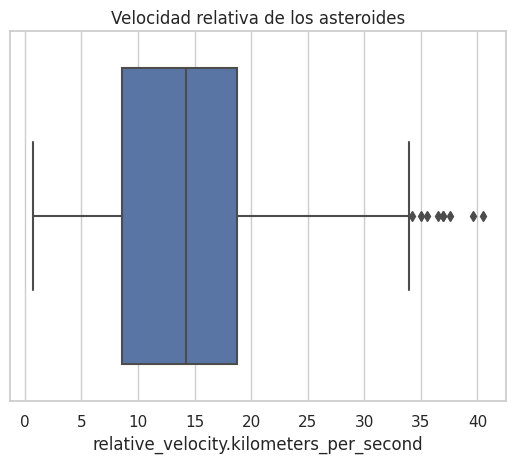

Rango:  39.8459916905
Media:  14.984227913170873
Mediana:  14.2571658357
Moda:  0       0.681437
1       1.333357
2       2.164376
3       2.344519
4       2.637492
         ...    
328    36.927161
329    36.927161
330    37.610169
331    39.605328
332    40.527428
Name: relative_velocity.kilometers_per_second, Length: 333, dtype: float64
Desviación estándar:  7.995994189625907
Varianza:  63.93592308053125


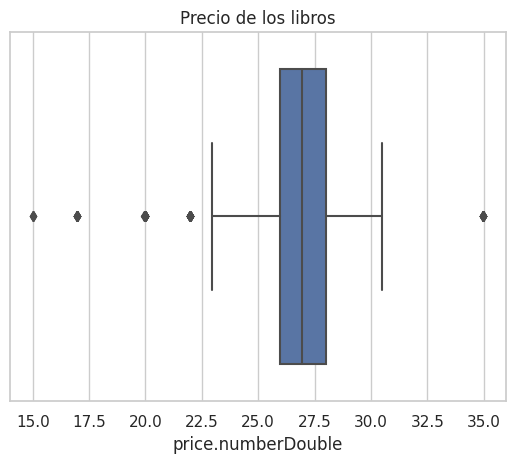

Rango:  20.0
Media:  26.818367952522255
Mediana:  26.95
Moda:  0    27.99
Name: price.numberDouble, dtype: float64
Desviación estándar:  1.787720189711883
Varianza:  3.195943476703491


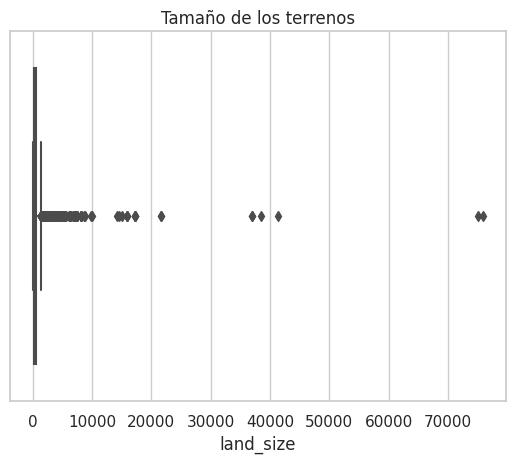

Rango:  76000.0
Media:  554.4580972007557
Mediana:  412.0
Moda:  0    0.0
Name: land_size, dtype: float64
Desviación estándar:  1460.432326429987
Varianza:  2132862.5800817036


In [29]:
filenames = ["near_earth_objects-jan_feb_1995-clean.csv", "new_york_times_bestsellers-clean.json", "melbourne_housing-clean.csv"]
near_earth_objects = pd.read_csv('../../Datasets/'+ filenames[0])
new_york_times_bestsellers = pd.read_json('../../Datasets/'+ filenames[1])
melbourne_housing = pd.read_csv('../../Datasets/'+ filenames[2])

def generate_boxplots(dataframe, column, title=None):
    sns.set(style="whitegrid")
    ax = sns.boxplot(x=dataframe[column])
    if title:
        ax.set_title(title)
    plt.show()
    generate_values(dataframe, column)
    

def generate_values(dataframe, column):
    rangeDf = dataframe[column].max() - dataframe[column].min()
    mean = dataframe[column].mean()
    median = dataframe[column].median()
    mode = dataframe[column].mode()
    std = dataframe[column].std()
    var = dataframe[column].var()
    print('Rango: ', rangeDf)
    print('Media: ', mean)
    print('Mediana: ', median)
    print('Moda: ', mode)
    print('Desviación estándar: ', std)
    print('Varianza: ', var)


generate_boxplots(near_earth_objects, 'estimated_diameter.meters.estimated_diameter_max', 'Diametro maximo estimado de los asteroides')
generate_boxplots(near_earth_objects, 'relative_velocity.kilometers_per_second', 'Velocidad relativa de los asteroides')
generate_boxplots(new_york_times_bestsellers, 'price.numberDouble', 'Precio de los libros')
generate_boxplots(melbourne_housing, 'land_size', 'Tamaño de los terrenos')




#### b) Eliminando valores atípicos

A partir de las visualizaciones que realizaste en el punto anterior, decide en cuáles columnas tenemos valores atípicos que pueden estorbarnos en nuestro análisis. Elimina dichos valores atípicos usando el Score de Rango Intercuartílico. Puedes probar variando un poco la medida del Score (1.5 * IQR) para eliminar solamente los valores que tú consideras como extremos.

Para observar los cambios a detalle, obtén la mediana, la media y la desviación estándar de tus datos *antes* y *después* de eliminar los valores atípicos. Compara estos valores y explica qué es lo que está pasando.

Grafica de nuevo tus datos sin valores atípicos para compararlos con las gráficas anteriores.

Comenta con la experta y tus compañeros tus hallazgos.

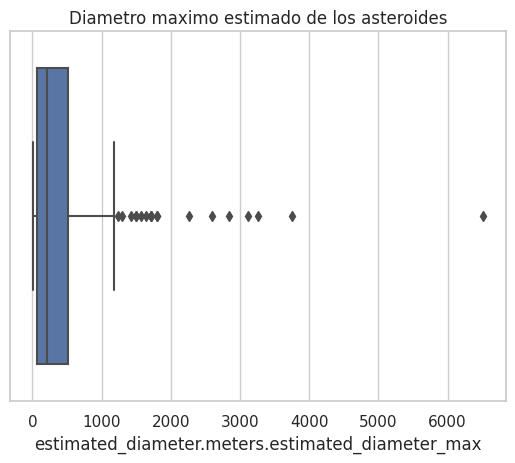

Rango:  6513.905031051
Media:  410.08604223976545
Mediana:  215.7943048444
Moda:  0    284.472297
Name: estimated_diameter.meters.estimated_diameter_max, dtype: float64
Desviación estándar:  614.6915918552232
Varianza:  377845.7530975083


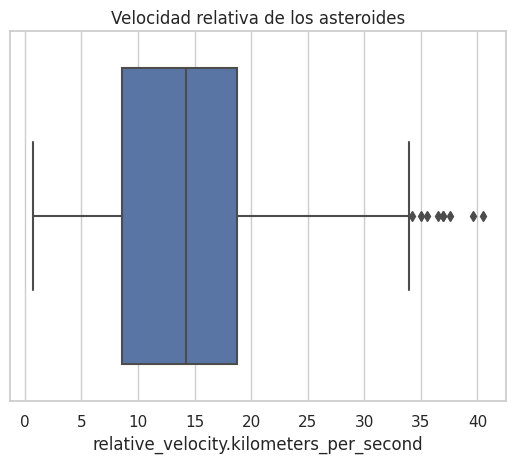

Rango:  39.8459916905
Media:  14.984227913170873
Mediana:  14.2571658357
Moda:  0       0.681437
1       1.333357
2       2.164376
3       2.344519
4       2.637492
         ...    
328    36.927161
329    36.927161
330    37.610169
331    39.605328
332    40.527428
Name: relative_velocity.kilometers_per_second, Length: 333, dtype: float64
Desviación estándar:  7.995994189625907
Varianza:  63.93592308053125


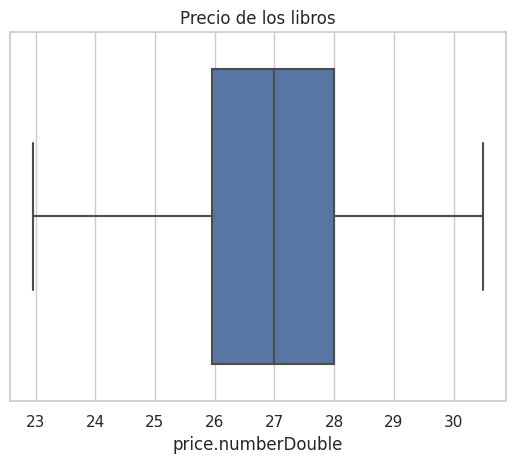

Rango:  7.550000000000001
Media:  26.94963389830508
Mediana:  26.99
Moda:  0    27.99
Name: price.numberDouble, dtype: float64
Desviación estándar:  1.3340443261095751
Varianza:  1.7796742640251504


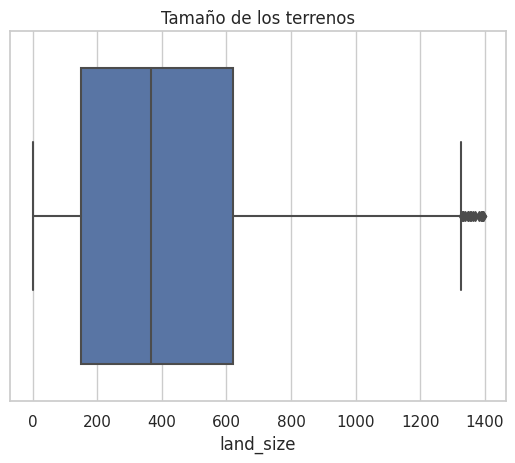

Rango:  1396.0
Media:  393.3221145052131
Mediana:  368.0
Moda:  0    0.0
Name: land_size, dtype: float64
Desviación estándar:  290.90216445879486
Varianza:  84624.06928681173


In [30]:
def remove_atipic_values(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    return df.loc[(df[col] > fence_low) & (df[col] < fence_high)]


near_earth_objects_outliers1 = remove_atipic_values(near_earth_objects, 'estimated_diameter.meters.estimated_diameter_max')
near_earth_objects_outliers2 = remove_atipic_values(near_earth_objects, 'relative_velocity.kilometers_per_second' )
new_york_times_bestsellers = remove_atipic_values(new_york_times_bestsellers, 'price.numberDouble' )
melbourne_housing = remove_atipic_values(melbourne_housing, 'land_size')




generate_boxplots(near_earth_objects, 'estimated_diameter.meters.estimated_diameter_max', 'Diametro maximo estimado de los asteroides')
generate_boxplots(near_earth_objects, 'relative_velocity.kilometers_per_second', 'Velocidad relativa de los asteroides')
generate_boxplots(new_york_times_bestsellers, 'price.numberDouble', 'Precio de los libros')
generate_boxplots(melbourne_housing, 'land_size', 'Tamaño de los terrenos')
